In [2]:
import numpy as np
from matplotlib import pyplot as plt
#import h5py

import time, os, re, sys

from sklearn import utils
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split, ParameterGrid

# K-fold validation
from sklearn.model_selection import RepeatedStratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Scoring
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import imblearn
from sklearn.metrics import accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pickle

classifier = "RandomForest"
with open(rf"../../Results/gr_{classifier}__.pkl", 'rb') as file:
 
    results = pickle.load(file)
 
    
df = pd.DataFrame(results.cv_results_)

print(df.columns)
df.tail()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_n_estimators', 'params', 'split0_test_f1_macro',
       'split1_test_f1_macro', 'split2_test_f1_macro', 'split3_test_f1_macro',
       'split4_test_f1_macro', 'split5_test_f1_macro', 'split6_test_f1_macro',
       'split7_test_f1_macro', 'split8_test_f1_macro', 'split9_test_f1_macro',
       'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro',
       'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy',
       'split3_test_Accuracy', 'split4_test_Accuracy', 'split5_test_Accuracy',
       'split6_test_Accuracy', 'split7_test_Accuracy', 'split8_test_Accuracy',
       'split9_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy',
       'rank_test_Accuracy', 'split0_test_AUC', 'split1_test_AUC',
       'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC',
       'split5_test_AUC', 'split6_test

c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Us

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
415     334.054024     12.557247         4.489929        0.050851   
416     400.833574      9.315598         5.366078        0.108667   
417     532.865737      9.061358         6.960982        0.099038   
418     673.357313      8.553843         8.692057        0.098984   
419     796.688949     11.808927        10.274309        0.106465   

    param_criterion param_max_depth param_min_samples_leaf param_n_estimators  \
415         entropy              13                  0.025                125   
416         entropy              13                  0.025                150   
417         entropy              13                  0.025                200   
418         entropy              13                  0.025                250   
419         entropy              13                  0.025                300   

                                                params  split0_test_f1_macro  \
415  {'criterion': 'entropy', 'max_depth': 13, 'min...              0.987659   
416  {'criterion': 'entropy', 'max_depth': 13, 'min...              0.987592   
417  {'criterion': 'entropy', 'max_depth': 13, 'min...              0.987510   
418  {'criterion': 'entropy', 'max_depth': 13, 'min...              0.987513   
419  {'criterion': 'entropy', 'max_depth': 13, 'min...              0.987555   

     ...  split3_test_AUC  split4_test_AUC  split5_test_AUC  split6_test_AUC  \
415  ...         0.993065         0.993295         0.993436         0.993306   
416  ...         0.993111         0.993211         0.993464         0.993133   
417  ...         0.993300         0.993295         0.993503         0.993387   
418  ...         0.993269         0.993456         0.993490         0.993273   
419  ...         0.993283         0.993401         0.993293         0.993271   

     split7_test_AUC  split8_test_AUC  split9_test_AUC  mean_test_AUC  \
415         0.993057         0.993221         0.993229       0.993211   
416         0.993117         0.993025         0.993409       0.993280   
417         0.993067         0.993321         0.993193       0.993313   
418         0.993249         0.993374         0.993374       0.993354   
419         0.993222         0.993182         0.993225       0.993287   

     std_test_AUC  rank_test_AUC  
415      0.000201            208  
416      0.000170            198  
417      0.000144            190  
418      0.000115            186  
419      0.000088            196  

[5 rows x 48 columns]

In [4]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_best = []
for metric in scoring:
    idx_best.append(df[f'rank_test_{metric}'].idxmin())


In [6]:
    
if idx_best.count(idx_best[0]) == len(idx_best):
    print("########## We have a winner! ##########")
    print("The best classificator is:")
    print(df.loc[idx_best[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][idx_best[0]]:5f}, std = {df['std_test_' + metric][idx_best[0]]:4f}")
else:
    print("Oh-oh there are more best estimators...")
    for i, met in zip(idx_best, scoring):
        print(f"Best classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][i]*100:.4f}, std = {df['std_test_' + metric][i]*100:.4f}")




Oh-oh there are more best estimators...
Best classificator for the metric f1_macro - idx 391
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 10}
Scorer results:
- f1_macro --> Mean = 99.1772, std = 0.0145
- Accuracy --> Mean = 99.1772, std = 0.0145
- AUC --> Mean = 99.6137, std = 0.0109
Best classificator for the metric Accuracy - idx 391
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 10}
Scorer results:
- f1_macro --> Mean = 99.1772, std = 0.0145
- Accuracy --> Mean = 99.1772, std = 0.0145
- AUC --> Mean = 99.6137, std = 0.0109
Best classificator for the metric AUC - idx 399
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 300}
Scorer results:
- f1_macro --> Mean = 99.1729, std = 0.0137
- Accuracy --> Mean = 99.1729, std = 0.0137
- AUC --> Mean = 99.6685, std = 0.0105


In [6]:

idx_worst = []
for metric in scoring:
    idx_worst.append(df[f'rank_test_{metric}'].idxmax())
    
    
if idx_worst.count(idx_worst[0]) == len(idx_worst):
    print("########## We have a loser! ##########")
    print("The worst classificator is:")
    print(df.loc[idx_worst[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][idx_worst[0]]:5f}, std = {df['std_test_' + metric][idx_worst[0]]:4f}")
else:
    print("Oh-oh there are more worst estimators...")
    for i, met in zip(idx_worst, scoring):
        print(f"Worst classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][i]}, std = {df['std_test_' + metric][i]}")



Oh-oh there are more worst estimators...
Worst classificator for the metric f1_macro - idx 10
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 0.01, 'n_estimators': 1}
Scorer results:
- f1_macro --> Mean = 0.7555960615427781, std = 0.2618663179627659
- Accuracy --> Mean = 0.7977515246922817, std = 0.20617597897427536
- AUC --> Mean = 0.7977517871220643, std = 0.2061757382429443
Worst classificator for the metric Accuracy - idx 230
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 0.025, 'n_estimators': 1}
Scorer results:
- f1_macro --> Mean = 0.7654485484325206, std = 0.17804882610581324
- Accuracy --> Mean = 0.788320234649823, std = 0.14815008123615583
- AUC --> Mean = 0.7883204564196106, std = 0.14814977418309908
Worst classificator for the metric AUC - idx 230
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 0.025, 'n_estimators': 1}
Scorer results:
- f1_macro --> Mean = 0.7654485484325206, std = 0.17804882610581324
- Accuracy --> Mean = 0.78832023464

In [8]:
dati = np.load("../Dataset/dati.npz")
X_raw = dati["X"]
y_raw = dati["y"]

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_raw, y_raw)

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

scaler.fit(X_raw)
X_scaled_raw = scaler.transform(X_raw)

# Applico la PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


thrEV = .95     # Soglia Explained Variance per pruning componenti

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature} features ")

pca = PCA()
pca.fit(X_scaled_raw)
X_pca_raw = pca.transform(X_scaled_raw)

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature_raw = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature_raw} features ")


# Pruno tenendo solo le prime componenti più informative
X_pruned = X_pca[:,:idxLastFeature]     # Pruno
X_pruned_raw = X_pca_raw[:,:idxLastFeature]     # Pruno


To have 95.0 % of Explaied Variance, we need 7 features 
To have 95.0 % of Explaied Variance, we need 8 features 


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.2, random_state=0)

In [10]:
idx = [idx_best[0], idx_best[2]]

y_pred = []
y_pred_proba = []

y_pred_raw = []
y_pred_proba_raw = []

for i in idx:
    params = df.loc[i]['params']
    clf = RandomForestClassifier(**params)
    clf = clf.fit(X_train, y_train)
    y_pred.append(clf.predict(X_test))
    y_pred_proba.append(clf.predict_proba(X_test)[:,1])
    y_pred_raw.append(clf.predict(X_pruned_raw))
    y_pred_proba_raw.append(clf.predict_proba(X_pruned_raw)[:,1])


In [11]:
cf_matrix = []

print('#### Dataset resamplato ###')


for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix.append(metrics.confusion_matrix(y_test, y_pred[i]))
    accuracy        =   metrics.accuracy_score(y_test, y_pred[i])
    precision       =   metrics.precision_score(y_test, y_pred[i])
    recall          =   metrics.recall_score(y_test, y_pred[i])
    f1              =   metrics.f1_score(y_test, y_pred[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")

print('#### Dataset originale ###')

cf_matrix_raw = []

for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix_raw.append(metrics.confusion_matrix(y_raw, y_pred_raw[i]))
    accuracy        =   metrics.accuracy_score(y_raw, y_pred_raw[i])
    precision       =   metrics.precision_score(y_raw, y_pred_raw[i])
    recall          =   metrics.recall_score(y_raw, y_pred_raw[i])
    f1              =   metrics.f1_score(y_raw, y_pred_raw[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")



#### Dataset resamplato ###
For idx = 391
-- accuracy = 0.9918
-- precision = 0.9839
-- recall = 1.0000
-- f1 = 0.9919
For idx = 399
-- accuracy = 0.9917
-- precision = 0.9837
-- recall = 1.0000
-- f1 = 0.9918
#### Dataset originale ###
For idx = 391
-- accuracy = 0.8185
-- precision = 0.0027
-- recall = 0.1985
-- f1 = 0.0053
For idx = 399
-- accuracy = 0.7924
-- precision = 0.0000
-- recall = 0.0015
-- f1 = 0.0000


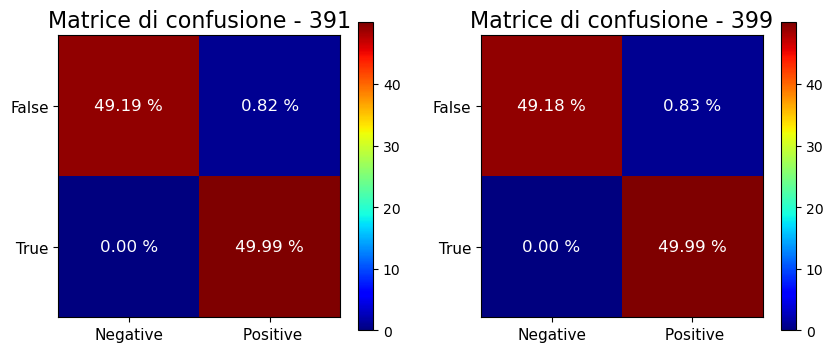

In [15]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()

for k, mat in enumerate(cf_matrix):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100



    # Plotto la matrice di covarianza
    im = ax[k].imshow(myConfMat, cmap = "jet", origin = "upper")

    ax[k].set_title(f"Matrice di confusione - {idx[k]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax[k].text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax[k].set_xticks((0,1))
    ax[k].set_xticklabels(['Negative',' Positive'], rotation='horizontal', fontsize=11)

    ax[k].set_yticks((0,1))
    ax[k].set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)


plt.show()

fig.savefig(f"../Relazione/Grafici/{classifier}-conf-matrix.eps", format = "eps", bbox_inches = "tight")


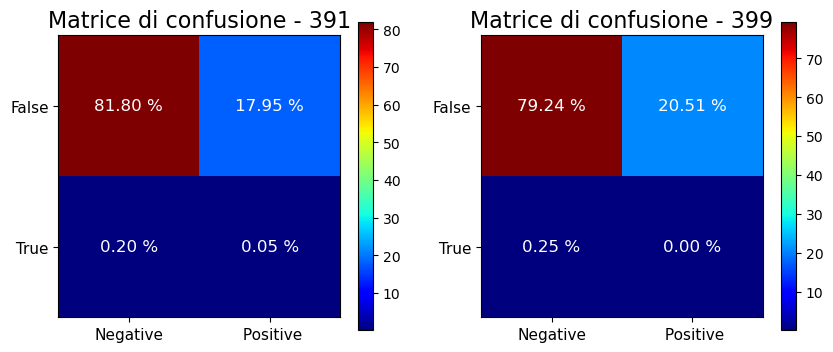

In [16]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()

for k, mat in enumerate(cf_matrix_raw):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100



    # Plotto la matrice di covarianza
    im = ax[k].imshow(myConfMat, cmap = "jet", origin = "upper")

    ax[k].set_title(f"Matrice di confusione - {idx[k]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax[k].text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax[k].set_xticks((0,1))
    ax[k].set_xticklabels(['Negative',' Positive'], rotation='horizontal', fontsize=11)

    ax[k].set_yticks((0,1))
    ax[k].set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)


plt.show()

fig.savefig(f"../Relazione/Grafici/{classifier}-conf-matrix-raw.eps", format = "eps", bbox_inches = "tight")


In [17]:
nrocstep = 100000                            # Numero punti per curva ROC
xROC = np.linspace(0,1,nrocstep)           # Vettore su cui interpolare curva ROC
yROC_lst = []

auc = []
for i,y in enumerate(y_pred_proba):
    # *** ROC Curve ***

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y)

    # Creo un'interpolazione denza per miglior calcolo aree
    yROC = np.interp(xROC, fpr, tpr)
    yROC_lst.append(yROC)
    #myAuc = metrics.auc(fpr, tpr)
    myAUC = metrics.auc(xROC, yROC)
    auc.append(myAUC)
    print(f"{idx[i]} --> AUC = {myAUC}")





391 --> AUC = 0.9960498469127615
399 --> AUC = 0.9966673277974354


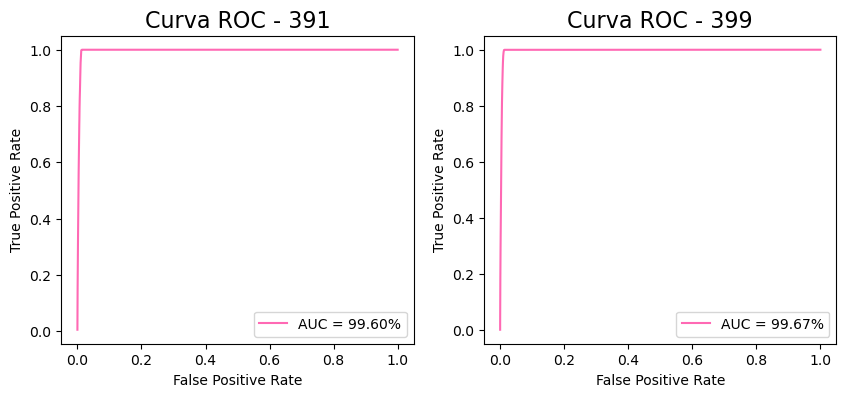

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [18]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()


for i, yROC in enumerate(yROC_lst):
    
    #create ROC curve
    ax[i].plot(xROC,yROC, c  = "hotpink", label = f"AUC = {auc[i]*100:.2f}%")
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_title(f"Curva ROC - {idx[i]}", fontsize = 16)
    ax[i].legend()


plt.show()

fig.savefig(f"../Relazione/Grafici/{classifier}-roc-curve.eps", format = "eps", bbox_inches = "tight")

